In [39]:
import pandas as pd

In [40]:
import decimal as D

In [41]:
years_of_data = 200

In [42]:
blocks_per_year = 6*24*365

In [43]:
max_height = blocks_per_year * years_of_data

In [44]:
s = pd.Series(range(0, max_height))

In [45]:
df = pd.DataFrame({'height': s})

In [46]:
COIN = 100 * 1000 * 1000 # one hundred million satoshis per bitcoin

In [47]:
nSubsidy = 50 * COIN

In [48]:
def halving_function(height):
    halvings = int(height/210000)
    return halvings

In [49]:
def subsidy_function(halvings):
    if halvings >= 64:
        return 0
    subsidy_reward = nSubsidy >> halvings
    return subsidy_reward

In [50]:
def binary_subsidy_function(subsidy_reward):
    return format(subsidy_reward, f"0{nSubsidy.bit_length()}b")    

In [51]:
df['halvings'] = (df.height/210000).astype(int)

In [52]:
df['subsidy_reward'] = df.halvings.apply(subsidy_function)

In [53]:
df['binary_subsidy_reward'] = df.subsidy_reward.apply(binary_subsidy_function)

In [54]:
df['total_expected_issuance'] = df.subsidy_reward.cumsum()

In [55]:
df

,height,halvings,subsidy_reward,binary_subsidy_reward,total_expected_issuance
0,0,0,5000000000,100101010000001011111001000000000,5000000000
1,1,0,5000000000,100101010000001011111001000000000,10000000000
2,2,0,5000000000,100101010000001011111001000000000,15000000000
3,3,0,5000000000,100101010000001011111001000000000,20000000000
4,4,0,5000000000,100101010000001011111001000000000,25000000000
...,...,...,...,...,...
10511995,10511995,50,0,000000000000000000000000000000000,2099999997690000
10511996,10511996,50,0,000000000000000000000000000000000,2099999997690000
10511997,10511997,50,0,000000000000000000000000000000000,2099999997690000
10511998,10511998,50,0,000000000000000000000000000000000,2099999997690000


In [56]:
df_eras = df.drop_duplicates(subset='subsidy_reward').reset_index()

In [57]:
# df_eras.to_csv('halving_eras.csv')


In [58]:
def sats_converter(float_str):
    btc = D.Decimal(float_str)
    sats = btc * COIN
    return int(sats)

In [59]:
audit_data_df = pd.read_csv('btc_audit_data_1599771452.791316.csv', low_memory=False, 
              converters={
                  'total_amount': sats_converter, 
                  'total_unspendable_amount': sats_converter,
                  'unspendable_amount': sats_converter,
                  'total_prevout_spent_amount': sats_converter,
                  'total_new_outputs_ex_coinbase_amount': sats_converter,
                  'coinbase_amount': sats_converter,
                         }
                )  


In [60]:
audit_data_df

,height,bestblock,txouts,bogosize,disk_size,total_amount,total_unspendable_amount,unspendable_amount,total_prevout_spent_amount,total_new_outputs_ex_coinbase_amount,coinbase_amount
0,0,000000000019d6689c085ae165831e934ff763ae46a2a6...,0,0,4829969239,0,5000000000,5000000000,0,0,0
1,1,00000000839a8e6886ab5951d76f411475428afc90947e...,1,117,4829969239,5000000000,5000000000,0,0,0,5000000000
2,2,000000006a625f06636b8bb6ac7b960a8d03705d1ace08...,2,234,4829969239,10000000000,5000000000,0,0,0,5000000000
3,3,0000000082b5015589a3fdf2d4baff403e6f0be035a5d9...,3,351,4829969239,15000000000,5000000000,0,0,0,5000000000
4,4,000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c...,4,468,4829969239,20000000000,5000000000,0,0,0,5000000000
...,...,...,...,...,...,...,...,...,...,...,...
647664,647664,00000000000000000001d1b91edbfb8415a6bfeebe8373...,66965132,5029305917,4809219431,1848522337847248,18287152752,0,1951992908642,1951977809593,640099049
647665,647665,0000000000000000000dd4e7438b0c8739f9cf3e3643cc...,66960068,5028936090,4809219431,1848522962847248,18287152752,0,2057360037437,2057316022203,669015234
647666,647666,0000000000000000000a4b30bae1950e4511441e76a9aa...,66963029,5029156464,4809219431,1848523587847248,18287152752,0,674429942198,674321291465,733650733
647667,647667,0000000000000000000d8d3b19199c9c85cc6702ca78b9...,66963174,5029166675,4809219431,1848524212847248,18287152752,0,2133678787159,2133640117046,663670113


In [62]:
result = pd.merge(audit_data_df, df, on=['height'])

In [63]:
result

,height,bestblock,txouts,bogosize,disk_size,total_amount,total_unspendable_amount,unspendable_amount,total_prevout_spent_amount,total_new_outputs_ex_coinbase_amount,coinbase_amount,halvings,subsidy_reward,binary_subsidy_reward,total_expected_issuance
0,0,000000000019d6689c085ae165831e934ff763ae46a2a6...,0,0,4829969239,0,5000000000,5000000000,0,0,0,0,5000000000,100101010000001011111001000000000,5000000000
1,1,00000000839a8e6886ab5951d76f411475428afc90947e...,1,117,4829969239,5000000000,5000000000,0,0,0,5000000000,0,5000000000,100101010000001011111001000000000,10000000000
2,2,000000006a625f06636b8bb6ac7b960a8d03705d1ace08...,2,234,4829969239,10000000000,5000000000,0,0,0,5000000000,0,5000000000,100101010000001011111001000000000,15000000000
3,3,0000000082b5015589a3fdf2d4baff403e6f0be035a5d9...,3,351,4829969239,15000000000,5000000000,0,0,0,5000000000,0,5000000000,100101010000001011111001000000000,20000000000
4,4,000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c...,4,468,4829969239,20000000000,5000000000,0,0,0,5000000000,0,5000000000,100101010000001011111001000000000,25000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647664,647664,00000000000000000001d1b91edbfb8415a6bfeebe8373...,66965132,5029305917,4809219431,1848522337847248,18287152752,0,1951992908642,1951977809593,640099049,3,625000000,000100101010000001011111001000000,1848540625000000
647665,647665,0000000000000000000dd4e7438b0c8739f9cf3e3643cc...,66960068,5028936090,4809219431,1848522962847248,18287152752,0,2057360037437,2057316022203,669015234,3,625000000,000100101010000001011111001000000,1848541250000000
647666,647666,0000000000000000000a4b30bae1950e4511441e76a9aa...,66963029,5029156464,4809219431,1848523587847248,18287152752,0,674429942198,674321291465,733650733,3,625000000,000100101010000001011111001000000,1848541875000000
647667,647667,0000000000000000000d8d3b19199c9c85cc6702ca78b9...,66963174,5029166675,4809219431,1848524212847248,18287152752,0,2133678787159,2133640117046,663670113,3,625000000,000100101010000001011111001000000,1848542500000000


In [64]:
result['issuance_delta'] = result.subsidy_reward - result.coinbase_amount + result.total_prevout_spent_amount - result.total_new_outputs_ex_coinbase_amount - result.unspendable_amount

In [65]:
result

,height,bestblock,txouts,bogosize,disk_size,total_amount,total_unspendable_amount,unspendable_amount,total_prevout_spent_amount,total_new_outputs_ex_coinbase_amount,coinbase_amount,halvings,subsidy_reward,binary_subsidy_reward,total_expected_issuance,issuance_delta
0,0,000000000019d6689c085ae165831e934ff763ae46a2a6...,0,0,4829969239,0,5000000000,5000000000,0,0,0,0,5000000000,100101010000001011111001000000000,5000000000,0
1,1,00000000839a8e6886ab5951d76f411475428afc90947e...,1,117,4829969239,5000000000,5000000000,0,0,0,5000000000,0,5000000000,100101010000001011111001000000000,10000000000,0
2,2,000000006a625f06636b8bb6ac7b960a8d03705d1ace08...,2,234,4829969239,10000000000,5000000000,0,0,0,5000000000,0,5000000000,100101010000001011111001000000000,15000000000,0
3,3,0000000082b5015589a3fdf2d4baff403e6f0be035a5d9...,3,351,4829969239,15000000000,5000000000,0,0,0,5000000000,0,5000000000,100101010000001011111001000000000,20000000000,0
4,4,000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c...,4,468,4829969239,20000000000,5000000000,0,0,0,5000000000,0,5000000000,100101010000001011111001000000000,25000000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647664,647664,00000000000000000001d1b91edbfb8415a6bfeebe8373...,66965132,5029305917,4809219431,1848522337847248,18287152752,0,1951992908642,1951977809593,640099049,3,625000000,000100101010000001011111001000000,1848540625000000,0
647665,647665,0000000000000000000dd4e7438b0c8739f9cf3e3643cc...,66960068,5028936090,4809219431,1848522962847248,18287152752,0,2057360037437,2057316022203,669015234,3,625000000,000100101010000001011111001000000,1848541250000000,0
647666,647666,0000000000000000000a4b30bae1950e4511441e76a9aa...,66963029,5029156464,4809219431,1848523587847248,18287152752,0,674429942198,674321291465,733650733,3,625000000,000100101010000001011111001000000,1848541875000000,0
647667,647667,0000000000000000000d8d3b19199c9c85cc6702ca78b9...,66963174,5029166675,4809219431,1848524212847248,18287152752,0,2133678787159,2133640117046,663670113,3,625000000,000100101010000001011111001000000,1848542500000000,0


In [66]:
result[result.issuance_delta != 0]

,height,bestblock,txouts,bogosize,disk_size,total_amount,total_unspendable_amount,unspendable_amount,total_prevout_spent_amount,total_new_outputs_ex_coinbase_amount,coinbase_amount,halvings,subsidy_reward,binary_subsidy_reward,total_expected_issuance,issuance_delta


Text(0.5, 0, 'Height')

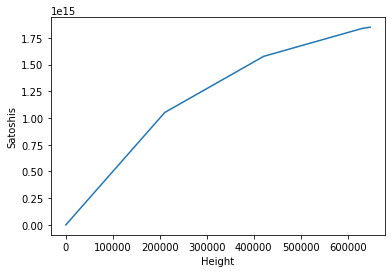

In [67]:
ax = result.total_expected_issuance.plot(x='height')
ax.set_ylabel("Satoshis")
ax.set_xlabel("Height")

In [68]:
total_transaction_fees = result.total_prevout_spent_amount.sum() - result.total_new_outputs_ex_coinbase_amount.sum()

In [83]:
result['transaction_fees'] = result.total_prevout_spent_amount - result.total_new_outputs_ex_coinbase_amount

In [84]:
result[result.transaction_fees<0]

,height,bestblock,txouts,bogosize,disk_size,total_amount,total_unspendable_amount,unspendable_amount,total_prevout_spent_amount,total_new_outputs_ex_coinbase_amount,coinbase_amount,halvings,subsidy_reward,binary_subsidy_reward,total_expected_issuance,issuance_delta,actual_transaction_fees,coinbase_losses,transaction_fees


In [85]:
result['coinbase_losses'] = result['subsidy_reward'] + result['transaction_fees'] - result['coinbase_amount']

In [87]:
result[result.coinbase_losses<0]

,height,bestblock,txouts,bogosize,disk_size,total_amount,total_unspendable_amount,unspendable_amount,total_prevout_spent_amount,total_new_outputs_ex_coinbase_amount,coinbase_amount,halvings,subsidy_reward,binary_subsidy_reward,total_expected_issuance,issuance_delta,actual_transaction_fees,coinbase_losses,transaction_fees


In [99]:
result['issuance_rec'] = result['total_expected_issuance'] - result['total_amount'] - result['total_unspendable_amount']

In [101]:
result[result.issuance_rec != 0]

,height,bestblock,txouts,bogosize,disk_size,total_amount,total_unspendable_amount,unspendable_amount,total_prevout_spent_amount,total_new_outputs_ex_coinbase_amount,coinbase_amount,halvings,subsidy_reward,binary_subsidy_reward,total_expected_issuance,issuance_delta,actual_transaction_fees,coinbase_losses,transaction_fees,issuance_rec


In [109]:
reconciliation = result[['total_expected_issuance','total_amount', 'total_unspendable_amount', 'issuance_rec']].copy()

In [110]:
reconciliation

,total_expected_issuance,total_amount,total_unspendable_amount,issuance_rec
0,5000000000,0,5000000000,0
1,10000000000,5000000000,5000000000,0
2,15000000000,10000000000,5000000000,0
3,20000000000,15000000000,5000000000,0
4,25000000000,20000000000,5000000000,0
...,...,...,...,...
647664,1848540625000000,1848522337847248,18287152752,0
647665,1848541250000000,1848522962847248,18287152752,0
647666,1848541875000000,1848523587847248,18287152752,0
647667,1848542500000000,1848524212847248,18287152752,0
